In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

victoria sc
antalaha mg
hobart au
port lincoln au
rabo de peixe pt
kavieng pg
sao joao da barra br
katsuura jp
jamestown sh
lavrentiya ru
leeuwarden nl
jiroft ir
santo domingo ec
marathon ca
hermanus za
hobart au
mataura pf
vaini to
puerto ayora ec
hambantota lk
kazachinskoye ru
iqaluit ca
clyde river ca
usvyaty ru
roma au
montes altos br
punta arenas cl
dingle ie
liwale tz
agustin codazzi co
canakkale tr
faanui pf
east london za
cape town za
rikitea pf
amderma ru
portland au
gao ml
longlac ca
cape town za
necochea ar
natal br
avarua ck
mys shmidta ru
bargal so
haibowan cn
hermanus za
turukhansk ru
saint-philippe re
ushuaia ar
macaboboni ph
rikitea pf
barrow us
saskylakh ru
ustyuzhna ru
noumea nc
san patricio mx
constitucion mx
cape town za
waingapu id
albany au
ust-kamchatsk ru
chinhoyi zw
rikitea pf
new norfolk au
aksu cn
ushuaia ar
praya id
punta arenas cl
atuona pf
kruisfontein za
punta arenas cl
albany au
mezhdurechensk ru
la ligua cl
margate za
punta arenas cl
ushuaia ar
albany a

carnarvon au
east london za
rikitea pf
nuuk gl
busselton au
kamina cd
kodiak us
souillac mu
albany au
adrar dz
leningradskiy ru
belushya guba ru
bluff nz
bredasdorp za
baker us
punta arenas cl
ilulissat gl
metro id
rikitea pf
bengkulu id
palabuhanratu id
lixourion gr
avarua ck
qaanaaq gl
mys shmidta ru
sentyabrskiy ru
butaritari ki
mackay au
hobart au
nome us
qasigiannguit gl
mataura pf
port-gentil ga
sedro-woolley us
busselton au
puerto ayora ec
rikitea pf
yulara au
punta arenas cl
elliot za
toliary mg
bluff nz
chuy uy
nikolskoye ru
east london za
athens us
haines junction ca
kapaa us
saleaula ws
rikitea pf
barrow us
hamilton us
lebedinyy ru
klyuchi ru
bethel us
jamestown sh
punta arenas cl
avarua ck
new norfolk au
bluff nz
upernavik gl
longyearbyen sj
senekal za
bluff nz
gardner us
ribeira grande pt
nantucket us
illoqqortoormiut gl
ngukurr au
zhanaozen kz
mataura pf
hasaki jp
danville us
bluff nz
bousse bf
cusuna hn
xiantao cn
pisco pe
atar mr
ushuaia ar
leshan cn
sorvag fo
dingle ie

tumannyy ru
isangel vu
taolanaro mg
hermanus za
rikitea pf
lanzhot cz
grand gaube mu
atar mr
punta arenas cl
yellowknife ca
bouca cf
husavik is
lebu cl
poum nc
jamestown sh
bredasdorp za
taolanaro mg
jamestown sh
gat ly
jamestown sh
palmer us
jamestown sh
taolanaro mg
tekeli kz
hamilton bm
nhulunbuy au
lazarev ru
colares pt
marsa matruh eg
puerto ayora ec
havre-saint-pierre ca
ribeira grande pt
springbok za
laguna br
taolanaro mg
thompson ca
huarmey pe
provideniya ru
nizhneyansk ru
lasa cn
dikson ru
marzuq ly
cordoba ar
ushuaia ar
nishihara jp
hihifo to
luderitz na
satitoa ws
la crosse us
mar del plata ar
atambua id
skagastrond is
albany au
santa rosa ar


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [7]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | victoria
Processing Record 2 of Set 13 | antalaha
Processing Record 3 of Set 13 | hobart
Processing Record 4 of Set 13 | port lincoln
Processing Record 5 of Set 13 | rabo de peixe
Processing Record 6 of Set 13 | kavieng
Processing Record 7 of Set 13 | sao joao da barra
Processing Record 8 of Set 13 | katsuura
Processing Record 9 of Set 13 | jamestown
Processing Record 10 of Set 13 | lavrentiya
Processing Record 11 of Set 13 | leeuwarden
Processing Record 12 of Set 13 | jiroft
City not found. Skipping...
Processing Record 13 of Set 13 | santo domingo
Processing Record 14 of Set 13 | marathon
Processing Record 15 of Set 13 | hermanus
Processing Record 16 of Set 13 | mataura
Processing Record 17 of Set 13 | vaini
Processing Record 18 of Set 13 | puerto ayora
Processing Record 19 of Set 13 | hambantota
Processing Record 20 of Set 13 | kazachinskoye
Processing Record 21 of Set 13 | iqaluit
Processing

Processing Record 32 of Set 16 | meulaboh
Processing Record 33 of Set 16 | suez
Processing Record 34 of Set 16 | ostrovnoy
Processing Record 35 of Set 16 | valdivia
Processing Record 36 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 37 of Set 16 | dagua
Processing Record 38 of Set 16 | cervo
Processing Record 39 of Set 16 | tuktoyaktuk
Processing Record 40 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 16 | olmos
Processing Record 42 of Set 16 | hobyo
Processing Record 43 of Set 16 | aloleng
Processing Record 44 of Set 16 | saleaula
City not found. Skipping...
Processing Record 45 of Set 16 | fort nelson
Processing Record 46 of Set 16 | laguna
Processing Record 47 of Set 16 | qui nhon
Processing Record 48 of Set 16 | cherskiy
Processing Record 49 of Set 16 | samarai
Processing Record 50 of Set 16 | manono
Processing Record 1 of Set 17 | grindavik
Processing Record 2 of Set 17 | ilhabela
Processing Record 3 of Set 17 | krasno

Processing Record 16 of Set 20 | upernavik
Processing Record 17 of Set 20 | neuquen
Processing Record 18 of Set 20 | la ronge
Processing Record 19 of Set 20 | kamina
Processing Record 20 of Set 20 | kodiak
Processing Record 21 of Set 20 | souillac
Processing Record 22 of Set 20 | baker
Processing Record 23 of Set 20 | metro
Processing Record 24 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 20 | lixourion
Processing Record 26 of Set 20 | mackay
Processing Record 27 of Set 20 | port-gentil
Processing Record 28 of Set 20 | sedro-woolley
Processing Record 29 of Set 20 | elliot
Processing Record 30 of Set 20 | toliary
City not found. Skipping...
Processing Record 31 of Set 20 | chuy
Processing Record 32 of Set 20 | haines junction
Processing Record 33 of Set 20 | lebedinyy
Processing Record 34 of Set 20 | klyuchi
Processing Record 35 of Set 20 | senekal
Processing Record 36 of Set 20 | gardner
Processing Record 37 of Set 20 | nantucket
Processing Record 3

Processing Record 1 of Set 24 | axim
Processing Record 2 of Set 24 | mogadishu
Processing Record 3 of Set 24 | seoul
Processing Record 4 of Set 24 | rapid valley
Processing Record 5 of Set 24 | oum hadjer
Processing Record 6 of Set 24 | addis abeba
Processing Record 7 of Set 24 | banjar
Processing Record 8 of Set 24 | port hardy
Processing Record 9 of Set 24 | mildura
Processing Record 10 of Set 24 | khorixas
Processing Record 11 of Set 24 | husavik
Processing Record 12 of Set 24 | casablanca
Processing Record 13 of Set 24 | kpandae
Processing Record 14 of Set 24 | kvam
Processing Record 15 of Set 24 | yerofey pavlovich
Processing Record 16 of Set 24 | balykshi
Processing Record 17 of Set 24 | tual
Processing Record 18 of Set 24 | rio gallegos
Processing Record 19 of Set 24 | olafsvik
Processing Record 20 of Set 24 | praia da vitoria
Processing Record 21 of Set 24 | gizo
Processing Record 22 of Set 24 | sibu
Processing Record 23 of Set 24 | kualakapuas
Processing Record 24 of Set 24 | 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,82.33,82,87,1.01,HK,2021-10-10 23:46:14
1,Antalaha,-14.9003,50.2788,64.18,86,19,6.51,MG,2021-10-10 23:51:53
2,Hobart,-42.8794,147.3294,53.02,51,20,13.80,AU,2021-10-10 23:48:12
3,Port Lincoln,-34.7333,135.8667,55.47,51,5,12.64,AU,2021-10-10 23:48:47
4,Rabo De Peixe,37.8000,-25.5833,69.31,94,75,11.50,PT,2021-10-10 23:49:24
5,Kavieng,-2.5744,150.7967,84.13,69,54,6.33,PG,2021-10-10 23:48:56
6,Sao Joao Da Barra,-21.6403,-41.0511,68.45,89,100,18.92,BR,2021-10-10 23:46:12
7,Katsuura,35.1333,140.3000,80.19,68,48,14.76,JP,2021-10-10 23:49:17
8,Jamestown,42.0970,-79.2353,66.02,83,1,5.01,US,2021-10-10 23:48:20
9,Lavrentiya,65.5833,-171.0000,30.67,79,54,3.47,RU,2021-10-10 23:48:59


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2021-10-10 23:46:14,22.2855,114.1577,82.33,82,87,1.01
1,Antalaha,MG,2021-10-10 23:51:53,-14.9003,50.2788,64.18,86,19,6.51
2,Hobart,AU,2021-10-10 23:48:12,-42.8794,147.3294,53.02,51,20,13.80
3,Port Lincoln,AU,2021-10-10 23:48:47,-34.7333,135.8667,55.47,51,5,12.64
4,Rabo De Peixe,PT,2021-10-10 23:49:24,37.8000,-25.5833,69.31,94,75,11.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

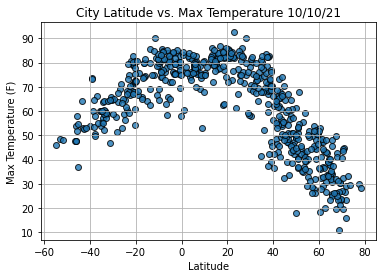

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

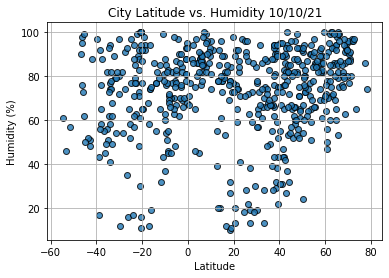

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

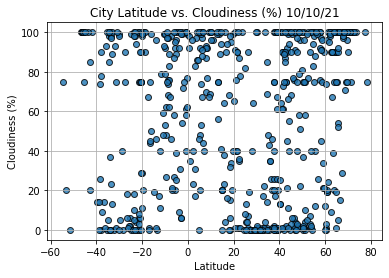

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

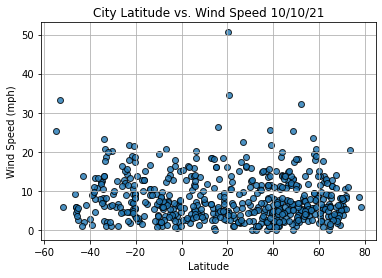

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()